### [ 참고 ] 

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

###  UCI 저장소에서 제공하는 피마인디언 데이타

- 1950년대까지 비만인이 없던 피마인디언 부족

- 그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다


- 샘플수(레코드) : 768
- 속성 : 8

        - 정보1 (pregnant) : 과거 임신 횟수
        - 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg)
        - 정보3 (pressure) : 혈압(mm Hg)
        - 정보4 (thickness) :삼두근 피부 주름 두께(mm)
        - 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml)
        - 정보6 (BMI) : 체질량지수  weight(kg)/(height(m)*height(m))
        - 정보7 (pedigree) : 당뇨병 가족력
        - 정보8 (age) : 나이
        
- 클래스 : 당뇨 (1:당뇨 / 0:당뇨아님)      


In [6]:
# (1) 데이타셋 로딩
#      pima-indians-diabetes.csv 파일을 데이타프레임으로 로딩하면서 컬럼명도 지정

import pandas as pd

df = pd.read_csv('./data/pima-indians-diabetes.csv')
# df #1번 레코드가 컬럼명으로 들어가 버림.

# 컬럼명을 넣어주는 작업
df = pd.read_csv('./data/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness',
                                                                'insulin','BMI','pedigree','age','diabetes'])

# 확인
df
df.head(10)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
# (2) 정보 확인
#  record가 몇개인가
print(df.shape)
print('-'*100)

# 자료형은 무엇인가
print(df.info())
print('-'*100)

# 기초통계형
print(df.describe())

(768, 9)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
----------------------------------------------------------------------------------------------------
         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.8945

## [연습]  임신횟수(pregnant)당 당뇨병 발생(diabetes) 확률을 구한다

          diabetes
pregnant          
0               38
1               29
2               19
3               27
4               23
5               21
6               16
7               25
8               22
9               18
10              10
11               7
12               4
13               5
14               2
15               1
17               1
          diabetes
pregnant          
0         0.342342
1         0.214815
2         0.184466
3         0.360000
4         0.338235
5         0.368421
6         0.320000
7         0.555556
8         0.578947
9         0.642857
10        0.416667
11        0.636364
12        0.444444
13        0.500000
14        1.000000
15        1.000000
17        1.000000


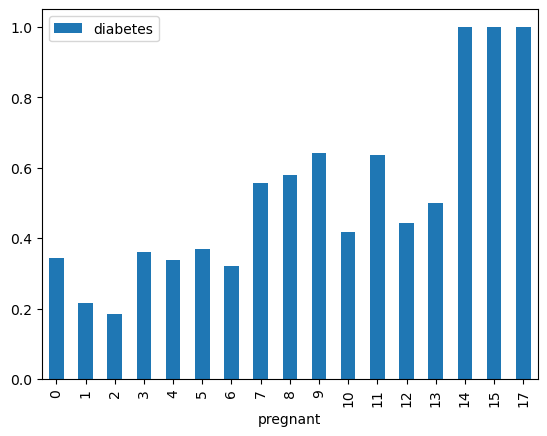

In [22]:
temp = df[['pregnant','diabetes']] # 해당하는 값들만 추출해서 변수에 담기
temp

# 1. 임신 횟수 당 당뇨병 발생 수로 묶기
temp2 = temp.groupby('pregnant').sum()
print(temp2)

# 2. 평균 값으로 묶기
temp3 = temp.groupby('pregnant').mean()
print(temp3)

# 3. chart -> 잘못된 차트 결과값 / 해결방법은 밑에 설명
temp3.plot(kind='bar'); 

[ 분석 ]  임신횟수가 14번 이상이면 당뇨병에 걸릴 확률이 100%인가? 

임신횟수가 14번 이상인 경우가 몇 건 없는데 당뇨병이라고 하여 이를 확정할 수 있나???`0

적어도 집단의 비율이 동일해야 예를 들어

1 ~ 3명 / 4 ~ 6명 / 7 ~ 9명 / 10 ~ 12명 / 13 ~ 이상명을 임신횟수를 가진 사람들을 각 집단에 100명씩 조사한 결과라던가 

[ 추가 고민 ] 임신횟수별 인원수를 구해서 나누면 되지 않을까나